<a href="https://colab.research.google.com/github/KuenzliJ/BINA/blob/main/HelloWorld.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
url = "https://raw.githubusercontent.com/KuenzliJ/BINA/refs/heads/main/Daten/heart_attack_dataset.csv"

In [ ]:
daten = pd.read_csv(url)
daten.head()

,Age,Gender,Cholesterol,BloodPressure,HeartRate,BMI,Smoker,Diabetes,Hypertension,FamilyHistory,...,ExerciseInducedAngina,Slope,NumberOfMajorVessels,Thalassemia,PreviousHeartAttack,StrokeHistory,Residence,EmploymentStatus,MaritalStatus,Outcome
0,31,Male,194,162,71,22.9,0,1,0,0,...,Yes,Downsloping,1,Normal,0,0,Suburban,Retired,Single,No Heart Attack
1,69,Male,208,148,93,33.9,1,1,0,0,...,Yes,Upsloping,2,Normal,0,0,Suburban,Unemployed,Married,No Heart Attack
2,34,Female,132,161,94,34.0,0,0,1,1,...,Yes,Upsloping,0,Normal,1,0,Rural,Retired,Single,Heart Attack
3,53,Male,268,134,91,35.0,0,1,1,0,...,Yes,Flat,0,Reversible defect,1,0,Suburban,Retired,Widowed,No Heart Attack
4,57,Female,203,140,75,30.1,0,1,0,0,...,Yes,Flat,0,Fixed defect,1,0,Rural,Retired,Married,Heart Attack


In [ ]:
counts = daten.groupby(['Gender', 'Outcome']).size().unstack(fill_value=0)
print(counts)

Outcome  Heart Attack  No Heart Attack
Gender                                
Female          93193            93011
Male            93123            93647


In [ ]:
counts['Heart Attack Probability'] = counts['Heart Attack'] / (counts['Heart Attack'] + counts['No Heart Attack'])

In [ ]:
counts['Heart Attack Probability'] = counts['Heart Attack Probability'] *100

In [ ]:
print(counts['Heart Attack Probability'])

Gender
Female    50.048871
Male      49.859721
Name: Heart Attack Probability, dtype: float64


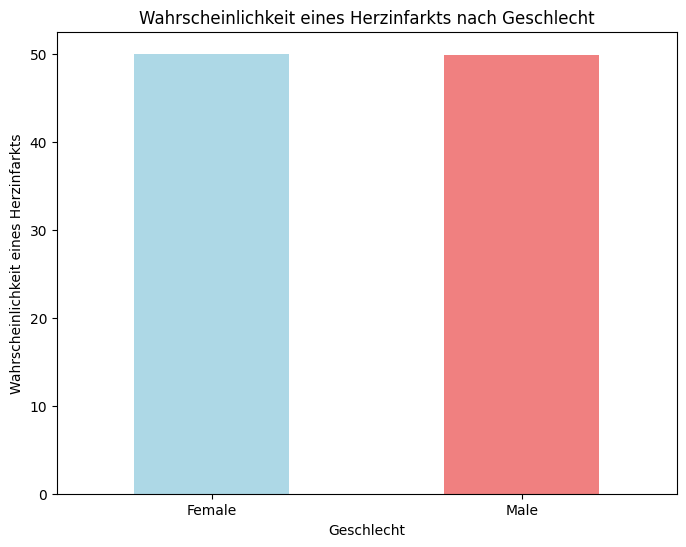

In [ ]:
probabilities = counts['Heart Attack Probability']

plt.figure(figsize=(8, 6))
probabilities.plot(kind='bar', color=['lightblue', 'lightcoral'])
plt.title('Wahrscheinlichkeit eines Herzinfarkts nach Geschlecht')
plt.xlabel('Geschlecht')
plt.ylabel('Wahrscheinlichkeit eines Herzinfarkts')
plt.xticks(rotation=0)
plt.show()